In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [55]:
## Import Panel data

df =  pd.read_csv(r"C:\Users\misko\OneDrive\Desktop\BDS\Block 3\Research Hackathon I\EconomicTracker_Covid\EconomicTracker\Panel_structure_preprocessing\covid_spending_cases_mobility_panel.csv")
dfStates = pd.read_csv(r"C:\Users\misko\OneDrive\Desktop\BDS\Block 3\Research Hackathon I\EconomicTracker_Covid\EconomicTracker\us-state-ansi-fips.csv")
df.columns

Index(['Unnamed: 0', 'year', 'week', 'statefips', 'month', 'day', 'spend_all',
       'spend_aap', 'spend_acf', 'spend_aer', 'spend_apg', 'spend_durables',
       'spend_nondurables', 'spend_grf', 'spend_gen', 'spend_hic', 'spend_hcs',
       'spend_inpersonmisc', 'spend_remoteservices', 'spend_sgh', 'spend_tws',
       'spend_retail_w_grocery', 'spend_retail_no_grocery',
       'spend_all_incmiddle', 'spend_all_q1', 'spend_all_q2', 'spend_all_q3',
       'spend_all_q4', 'provisional', 'date', 'gps_retail_and_recreation',
       'gps_grocery_and_pharmacy', 'gps_workplaces', 'gps_residential',
       'gps_away_from_home', 'stayathome_advisory', 'nonessbiz_closed',
       'isolation_dummy', 'new_case_rate', 'case_rate', 'new_death_rate',
       'death_rate', 'new_test_rate', 'test_rate', 'new_vaccine_rate',
       'vaccine_rate', 'fullvaccine_rate', 'booster_first_rate',
       'hospitalized_rate'],
      dtype='object')

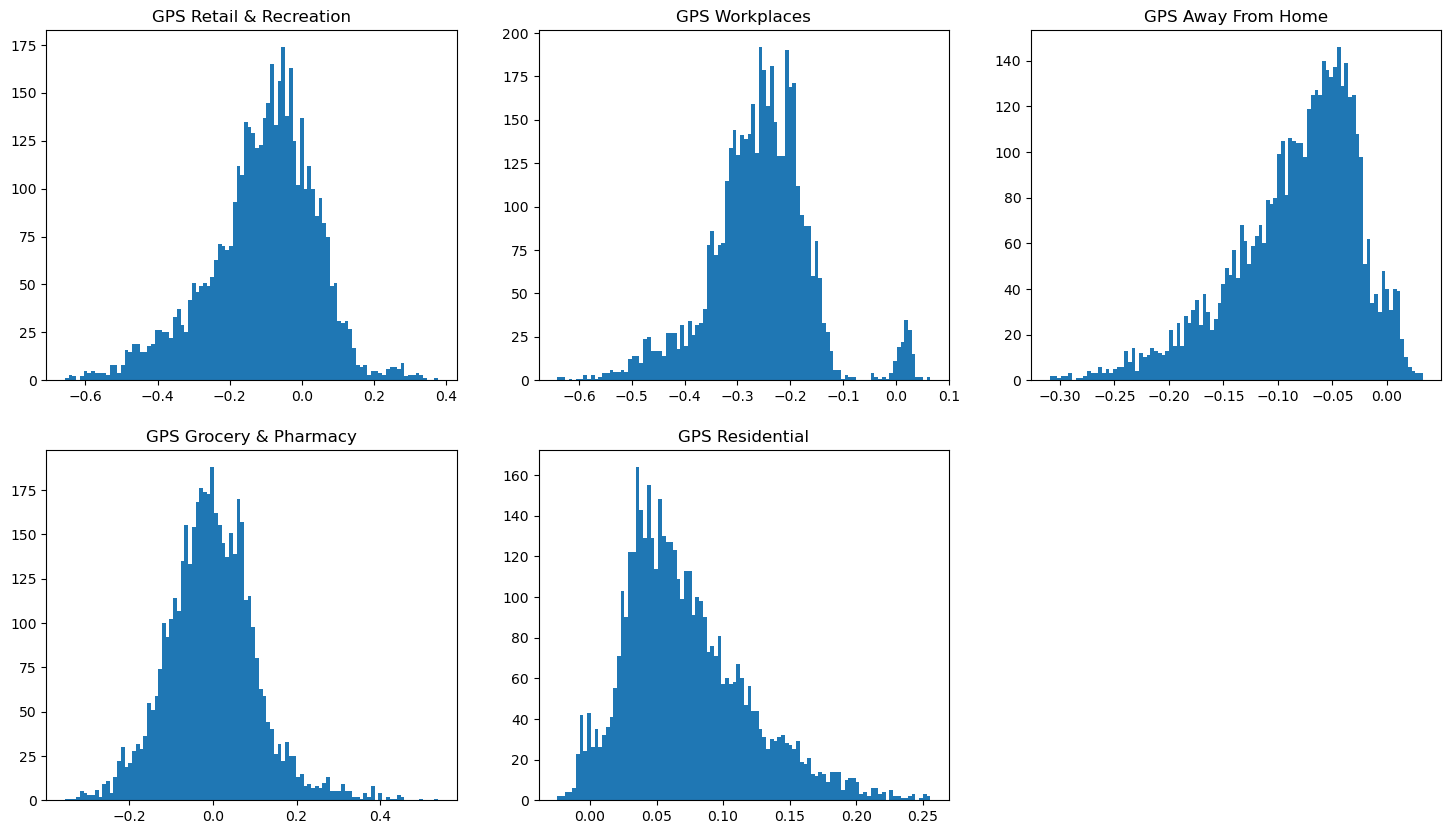

In [3]:
## Mobility Index Distributions For All States

fig, ax = plt.subplots(nrows = 2, ncols =3, figsize = (18,10))
ax[0,0].hist(df["gps_retail_and_recreation"], bins = 100)
ax[0,0].set_title("GPS Retail & Recreation")

ax[0,1].hist(df["gps_workplaces"], bins = 100)
ax[0,1].set_title("GPS Workplaces")

ax[0,2].hist(df["gps_away_from_home"], bins = 100)
ax[0,2].set_title("GPS Away From Home")

ax[1,0].hist(df["gps_grocery_and_pharmacy"], bins = 100)
ax[1,0].set_title("GPS Grocery & Pharmacy")

ax[1,1].hist(df["gps_residential"], bins = 100)
ax[1,1].set_title("GPS Residential")

ax[1,2].set_visible(False)
plt.show()

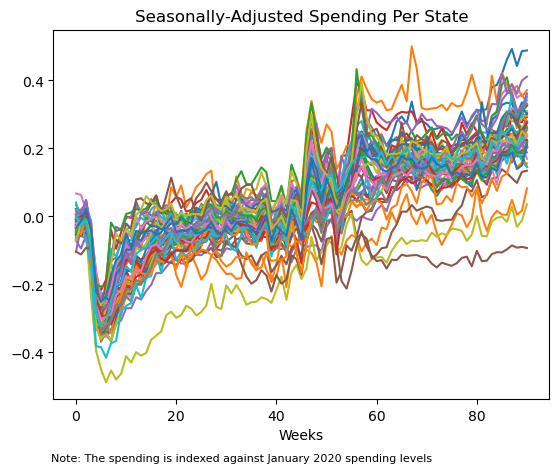

In [4]:
## Spending Spaghetti Plot

for i in list(set(df["statefips"])):
    plt.plot(range(91), df.loc[df["statefips"] == i, "spend_all"])
plt.title("Seasonally-Adjusted Spending Per State")
plt.xlabel("Weeks")
note = 'Note: The spending is indexed against January 2020 spending levels'
plt.text(-5, -0.72, note, ha='left', size = 8)
plt.show()

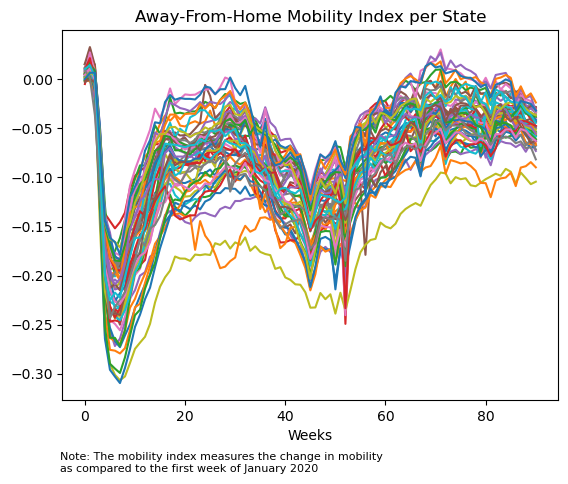

In [14]:
## Mobility Spaghetti Plot

for i in list(set(df["statefips"])):
    plt.plot(range(91), df.loc[df["statefips"] == i, "gps_away_from_home"])
plt.title("Away-From-Home Mobility Index per State")
plt.xlabel("Weeks")
note = 'Note: The mobility index measures the change in mobility \nas compared to the first week of January 2020'
plt.text(-5, -0.4, note, ha='left', size = 8)
plt.show()

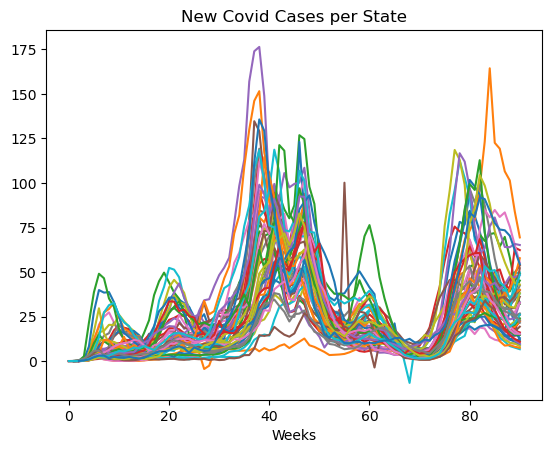

In [6]:
## Covid Cases Spaghetti Plot

for i in list(set(df["statefips"])):
    plt.plot(range(91), df.loc[df["statefips"] == i, "new_case_rate"])
plt.title("New Covid Cases per State")
plt.xlabel("Weeks")
plt.show()

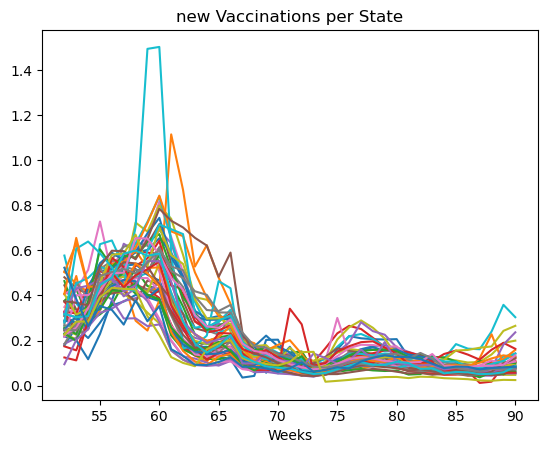

In [12]:
## Vacciation Spaghetti Plot

for i in list(set(df["statefips"])):
    plt.plot(range(91), df.loc[df["statefips"] == i, "new_vaccine_rate"])
plt.title("new Vaccinations per State")
plt.xlabel("Weeks")
plt.show()

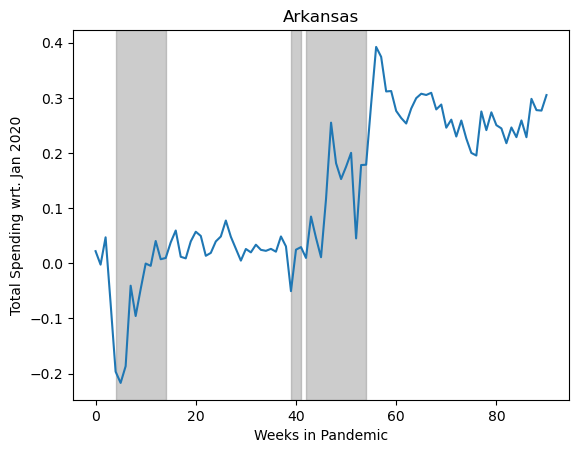

In [77]:
states = list(set(df["statefips"]))
stateNames = list(dfStates["stname"])

whichState = 3

state = states[whichState]
stateName = stateNames[whichState]

lines = []
for i in range(1, len(list(df.loc[df["statefips"] == state, "isolation_dummy"]))):
    if list(df.loc[df["statefips"] == state, "isolation_dummy"])[i-1] != list(df.loc[df["statefips"] == state, "isolation_dummy"])[i]:
        lines.append(i)

plt.plot(range(91), df.loc[df["statefips"] == state, "spend_all"])
plt.title(stateName)
plt.xlabel("Weeks in Pandemic")
plt.ylabel("Total Spending wrt. Jan 2020")
for i in range(0,len(lines)-1,2):
    plt.axvspan(lines[i], lines[i+1], color="grey", alpha = 0.4)
plt.show()

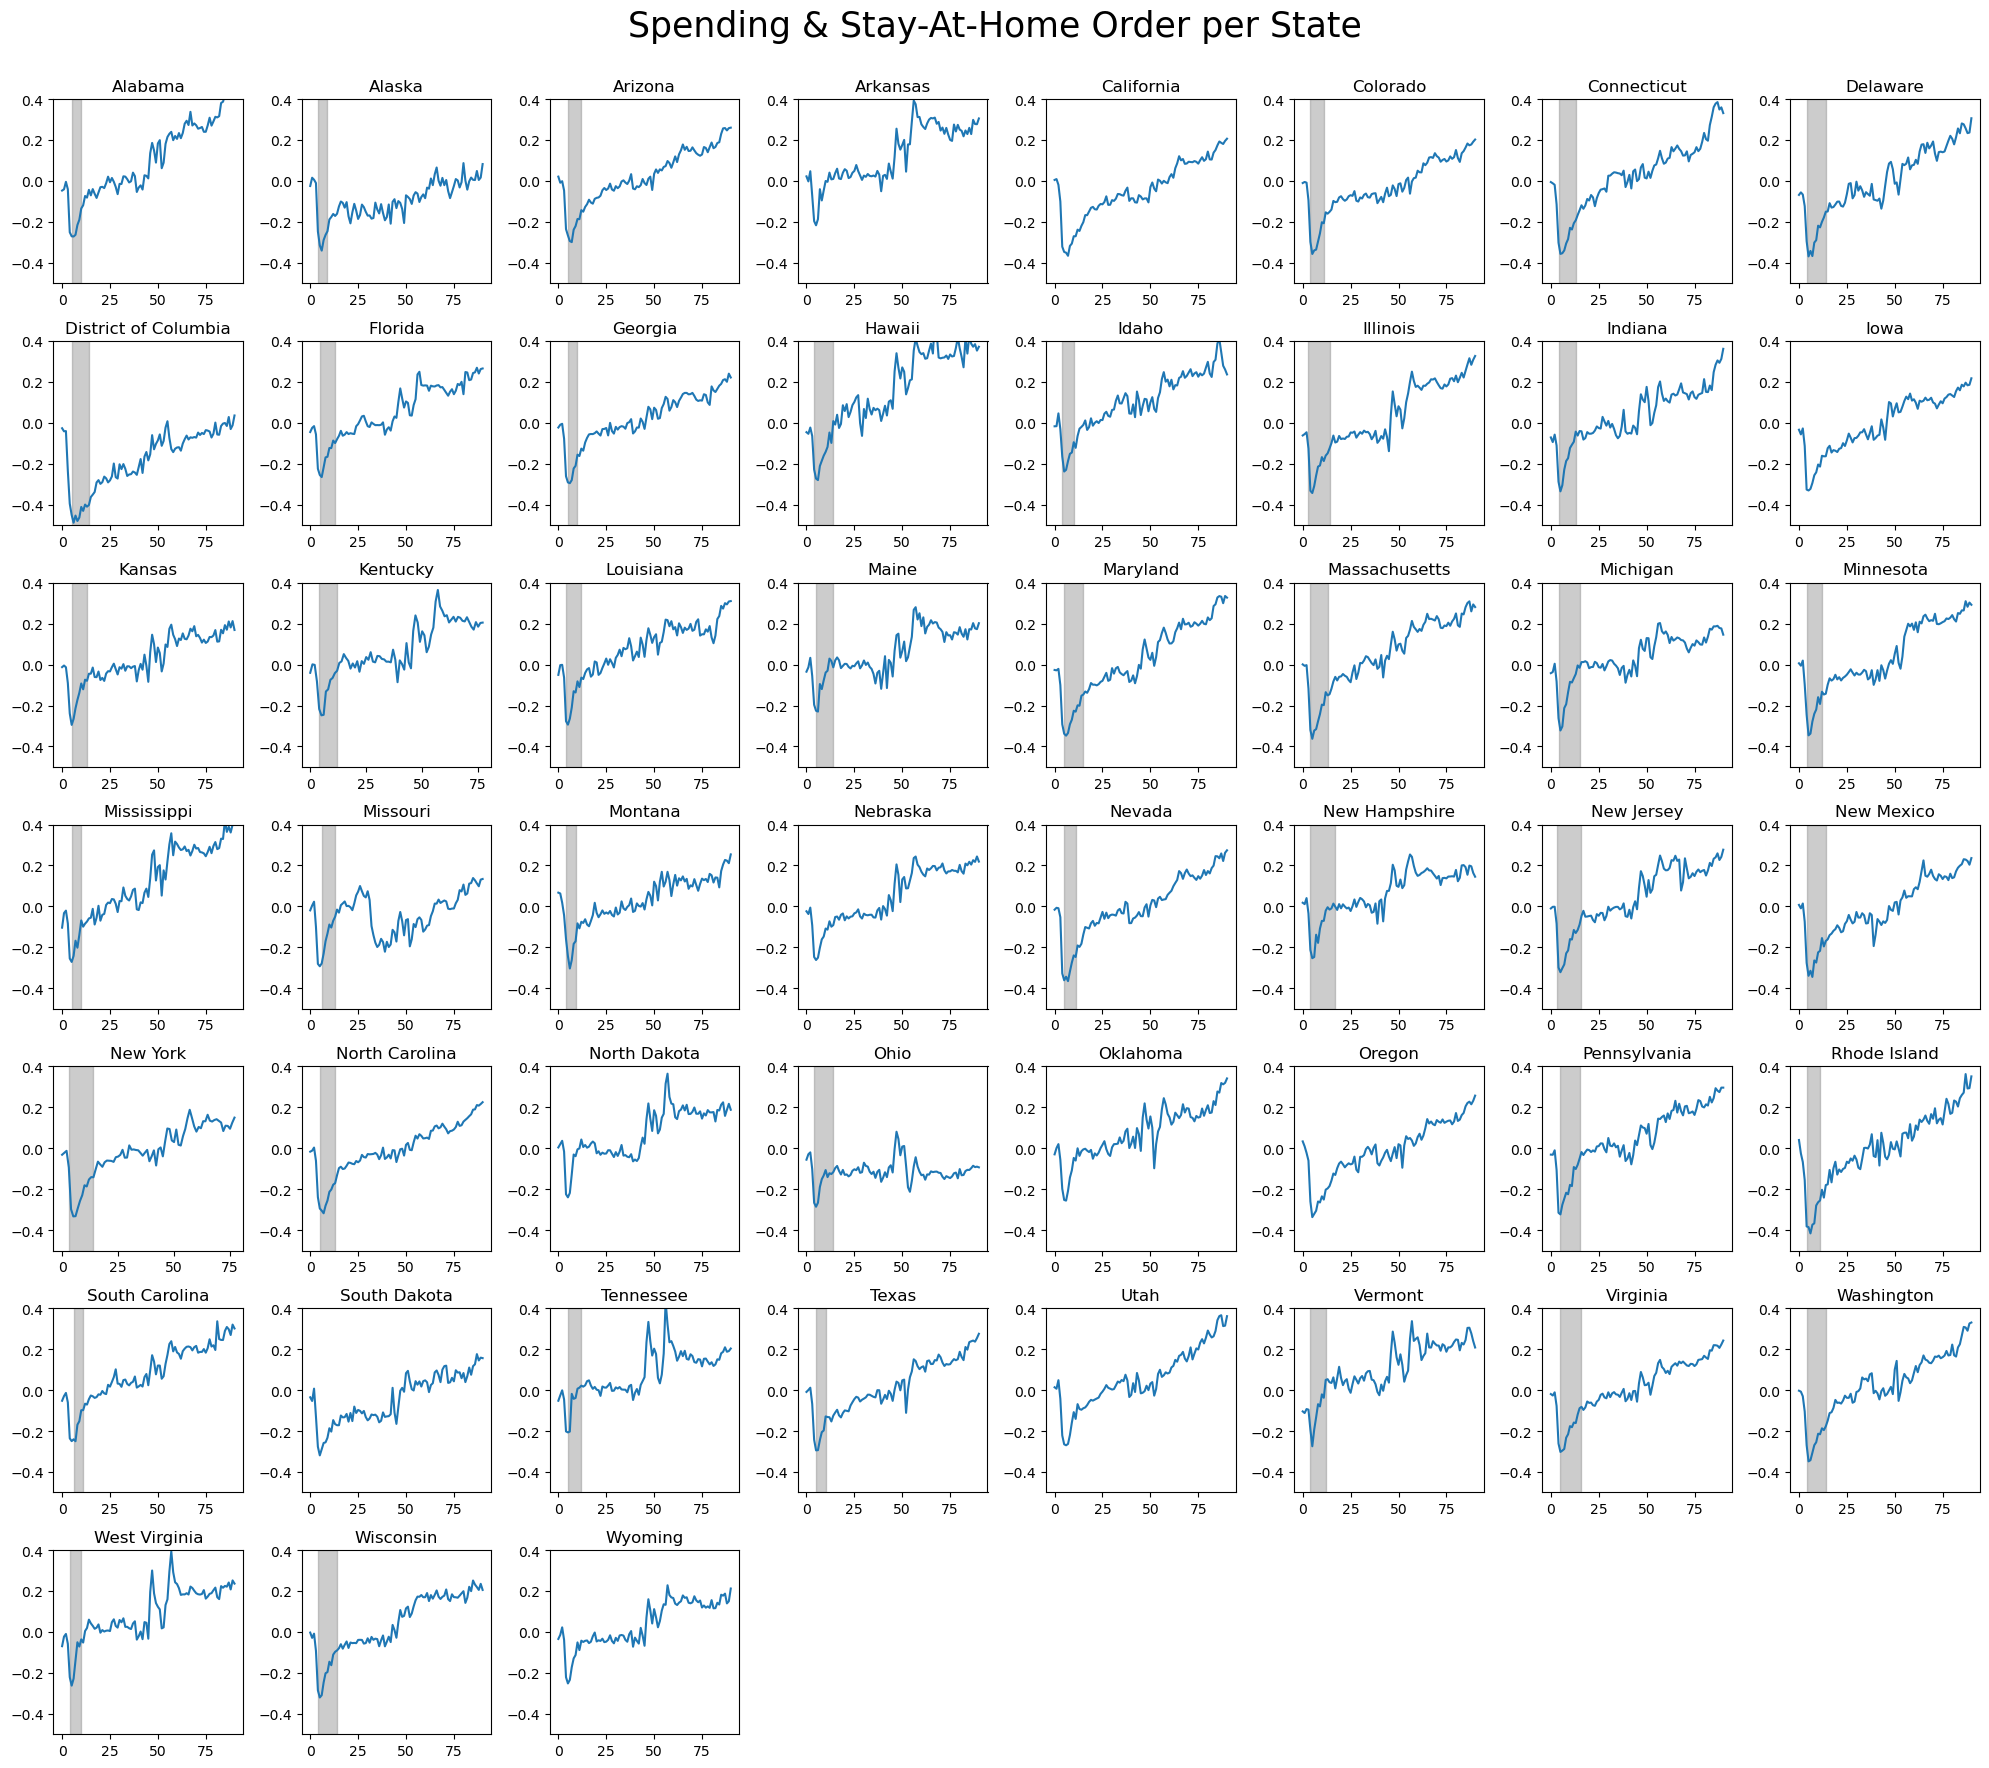

In [58]:
#Subplots per state for total spending with shaded region being the official stay-at-home order

fig, ax = plt.subplots(nrows = 7, ncols = 8, figsize=(20,18))

states = list(set(df["statefips"]))
stateNames = list(dfStates["stname"])
s = 0
for i in range(7):
    for j in range(8):
        if s < 51:
            state = states[s]
        
            lines = []
            for k in range(1, len(list(df.loc[df["statefips"] == state, "stayathome_advisory"]))):
                if list(df.loc[df["statefips"] == state, "stayathome_advisory"])[k-1] != list(df.loc[df["statefips"] == state, "stayathome_advisory"])[k]:
                    lines.append(k)

            ax[i][j].plot(range(91), df.loc[df["statefips"] == state, "spend_all"])
            ax[i][j].set_ylim(-0.5, 0.4)
            ax[i][j].title.set_text(stateNames[s])
            for l in range(0,len(lines)-1,2):
                ax[i][j].axvspan(lines[l], lines[l+1], color="grey", alpha = 0.4)
            s += 1
        else:
            ax[i][j].set_visible(False)
fig.suptitle("Spending & Stay-At-Home Order per State", fontsize=25)
fig.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

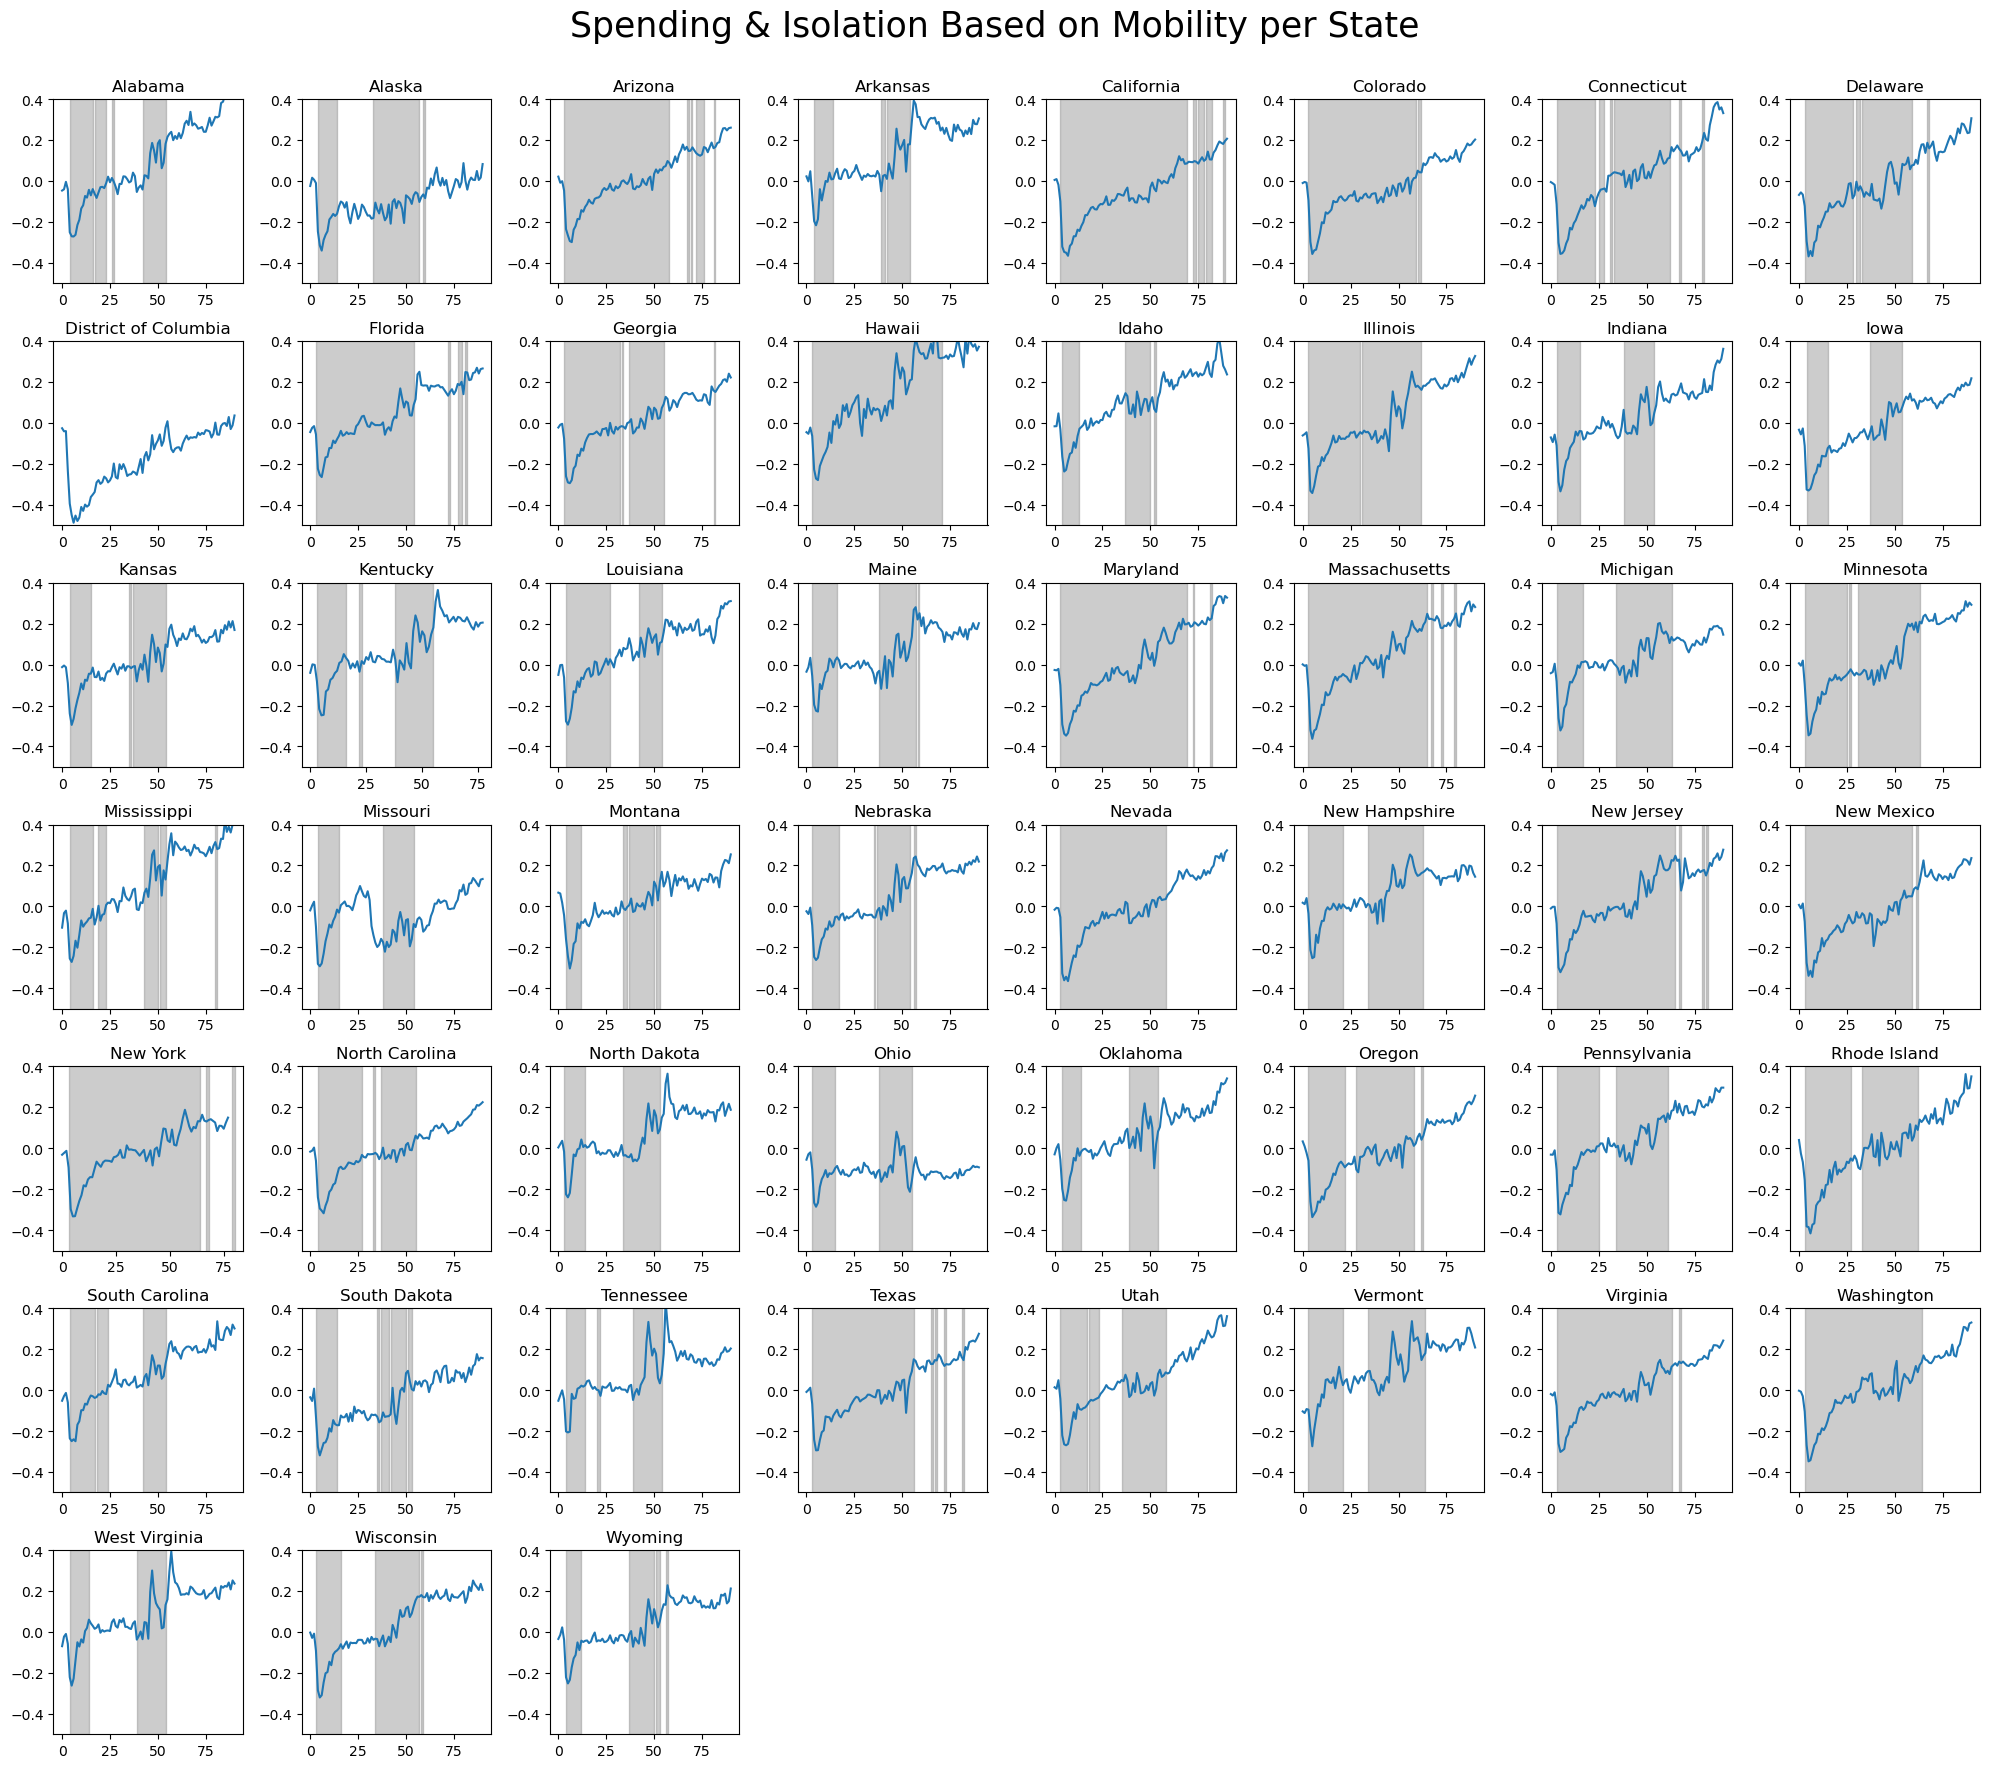

In [59]:
#Subplots per state for total spending with shaded region being the weeks when the 
# mobility of people in that state fell under the national median (our own isolation dummy)

fig, ax = plt.subplots(nrows = 7, ncols = 8, figsize=(20,18))

states = list(set(df["statefips"]))
stateNames = list(dfStates["stname"])
s = 0
for i in range(7):
    for j in range(8):
        if s < 51:
            state = states[s]
        
            lines = []
            for k in range(1, len(list(df.loc[df["statefips"] == state, "isolation_dummy"]))):
                if list(df.loc[df["statefips"] == state, "isolation_dummy"])[k-1] != list(df.loc[df["statefips"] == state, "isolation_dummy"])[k]:
                    lines.append(k)

            ax[i][j].plot(range(91), df.loc[df["statefips"] == state, "spend_all"])
            ax[i][j].set_ylim(-0.5, 0.4)
            ax[i][j].title.set_text(stateNames[s])
            for l in range(0,len(lines)-1,2):
                ax[i][j].axvspan(lines[l], lines[l+1], color="grey", alpha = 0.4)
            s += 1
        else:
            ax[i][j].set_visible(False)
fig.suptitle("Spending & Isolation Based on Mobility per State", fontsize=25)
fig.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

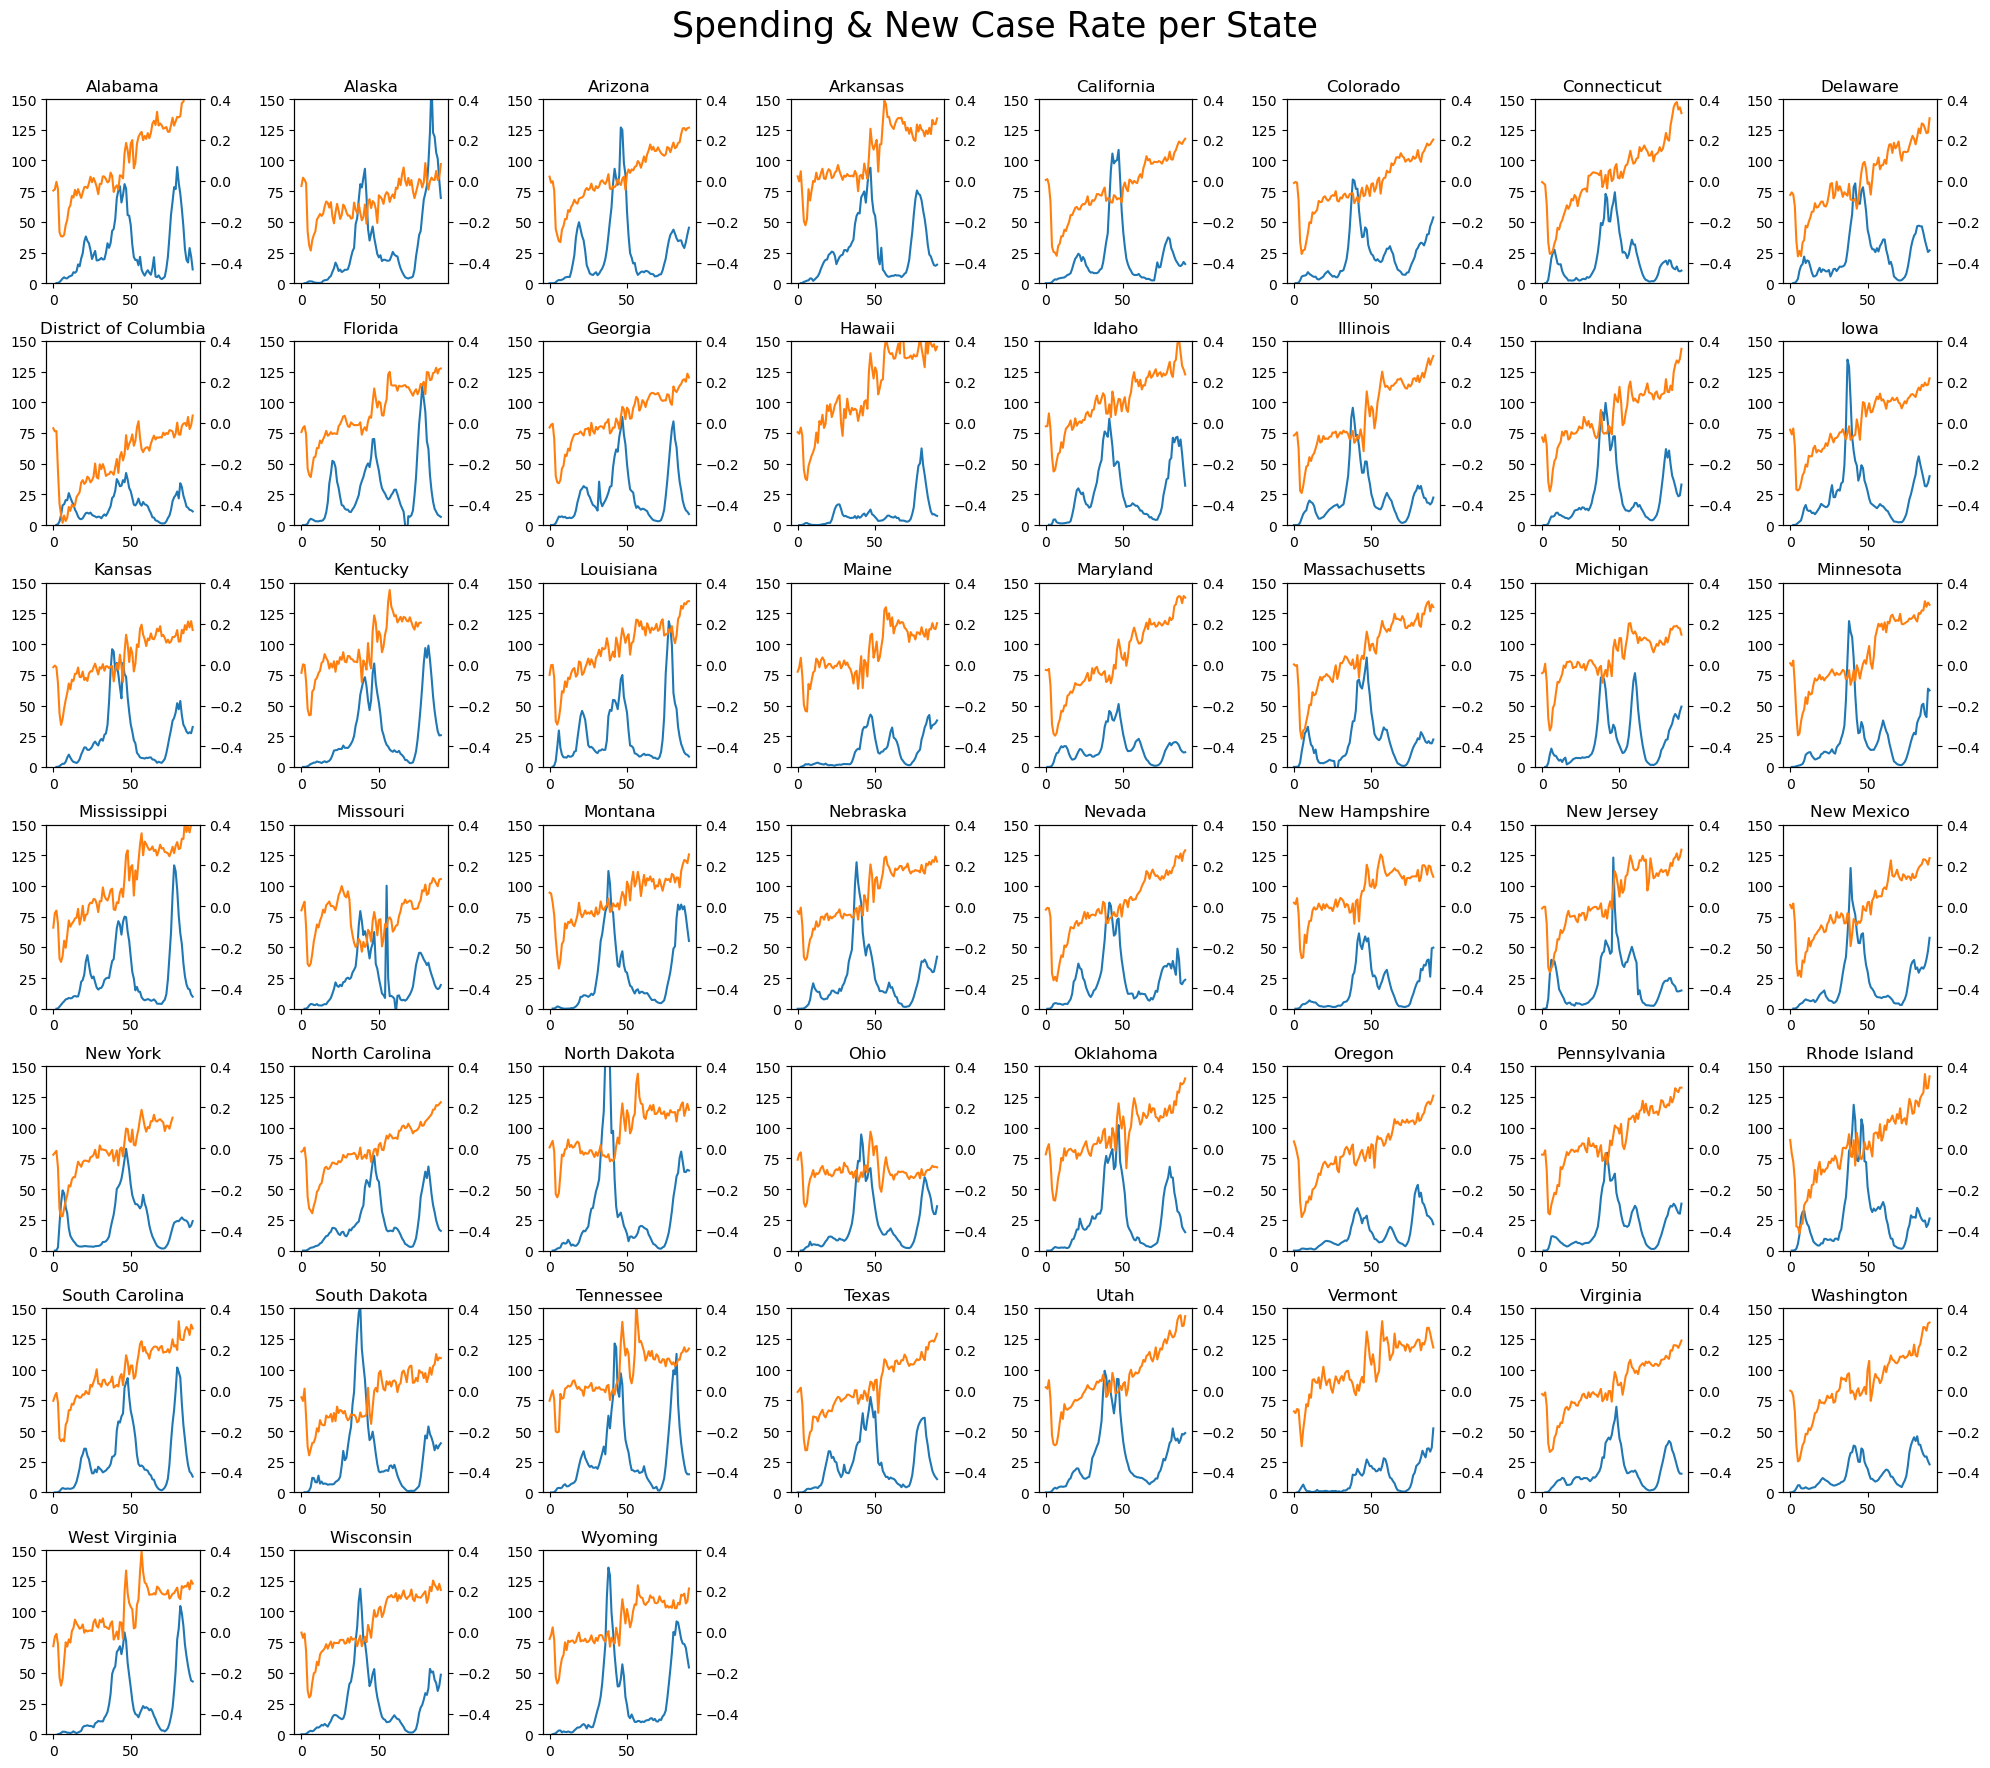

In [78]:
#Subplots per state for total spending in orange (right y-axis) and new cases per 100k in blue (left y-axis)

fig, ax = plt.subplots(nrows = 7, ncols = 8, figsize=(20,18))

states = list(set(df["statefips"]))
stateNames = list(dfStates["stname"])
s = 0
for i in range(7):
    for j in range(8):
        if s < 51:
            ax[i][j].plot(range(91), df.loc[df["statefips"] == states[s], "new_case_rate"], color = "tab:blue")
            ax[i][j].set_ylim(0, 150)
            ax2 = ax[i][j].twinx()
            ax2.plot(range(91), df.loc[df["statefips"] == states[s], "spend_all"], color = "tab:orange")
            ax2.set_ylim(-0.5, 0.4)
            ax[i][j].title.set_text(stateNames[s])
            s += 1
        else:
            ax[i][j].set_visible(False)
fig.suptitle("Spending & New Case Rate per State", fontsize=25)
fig.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

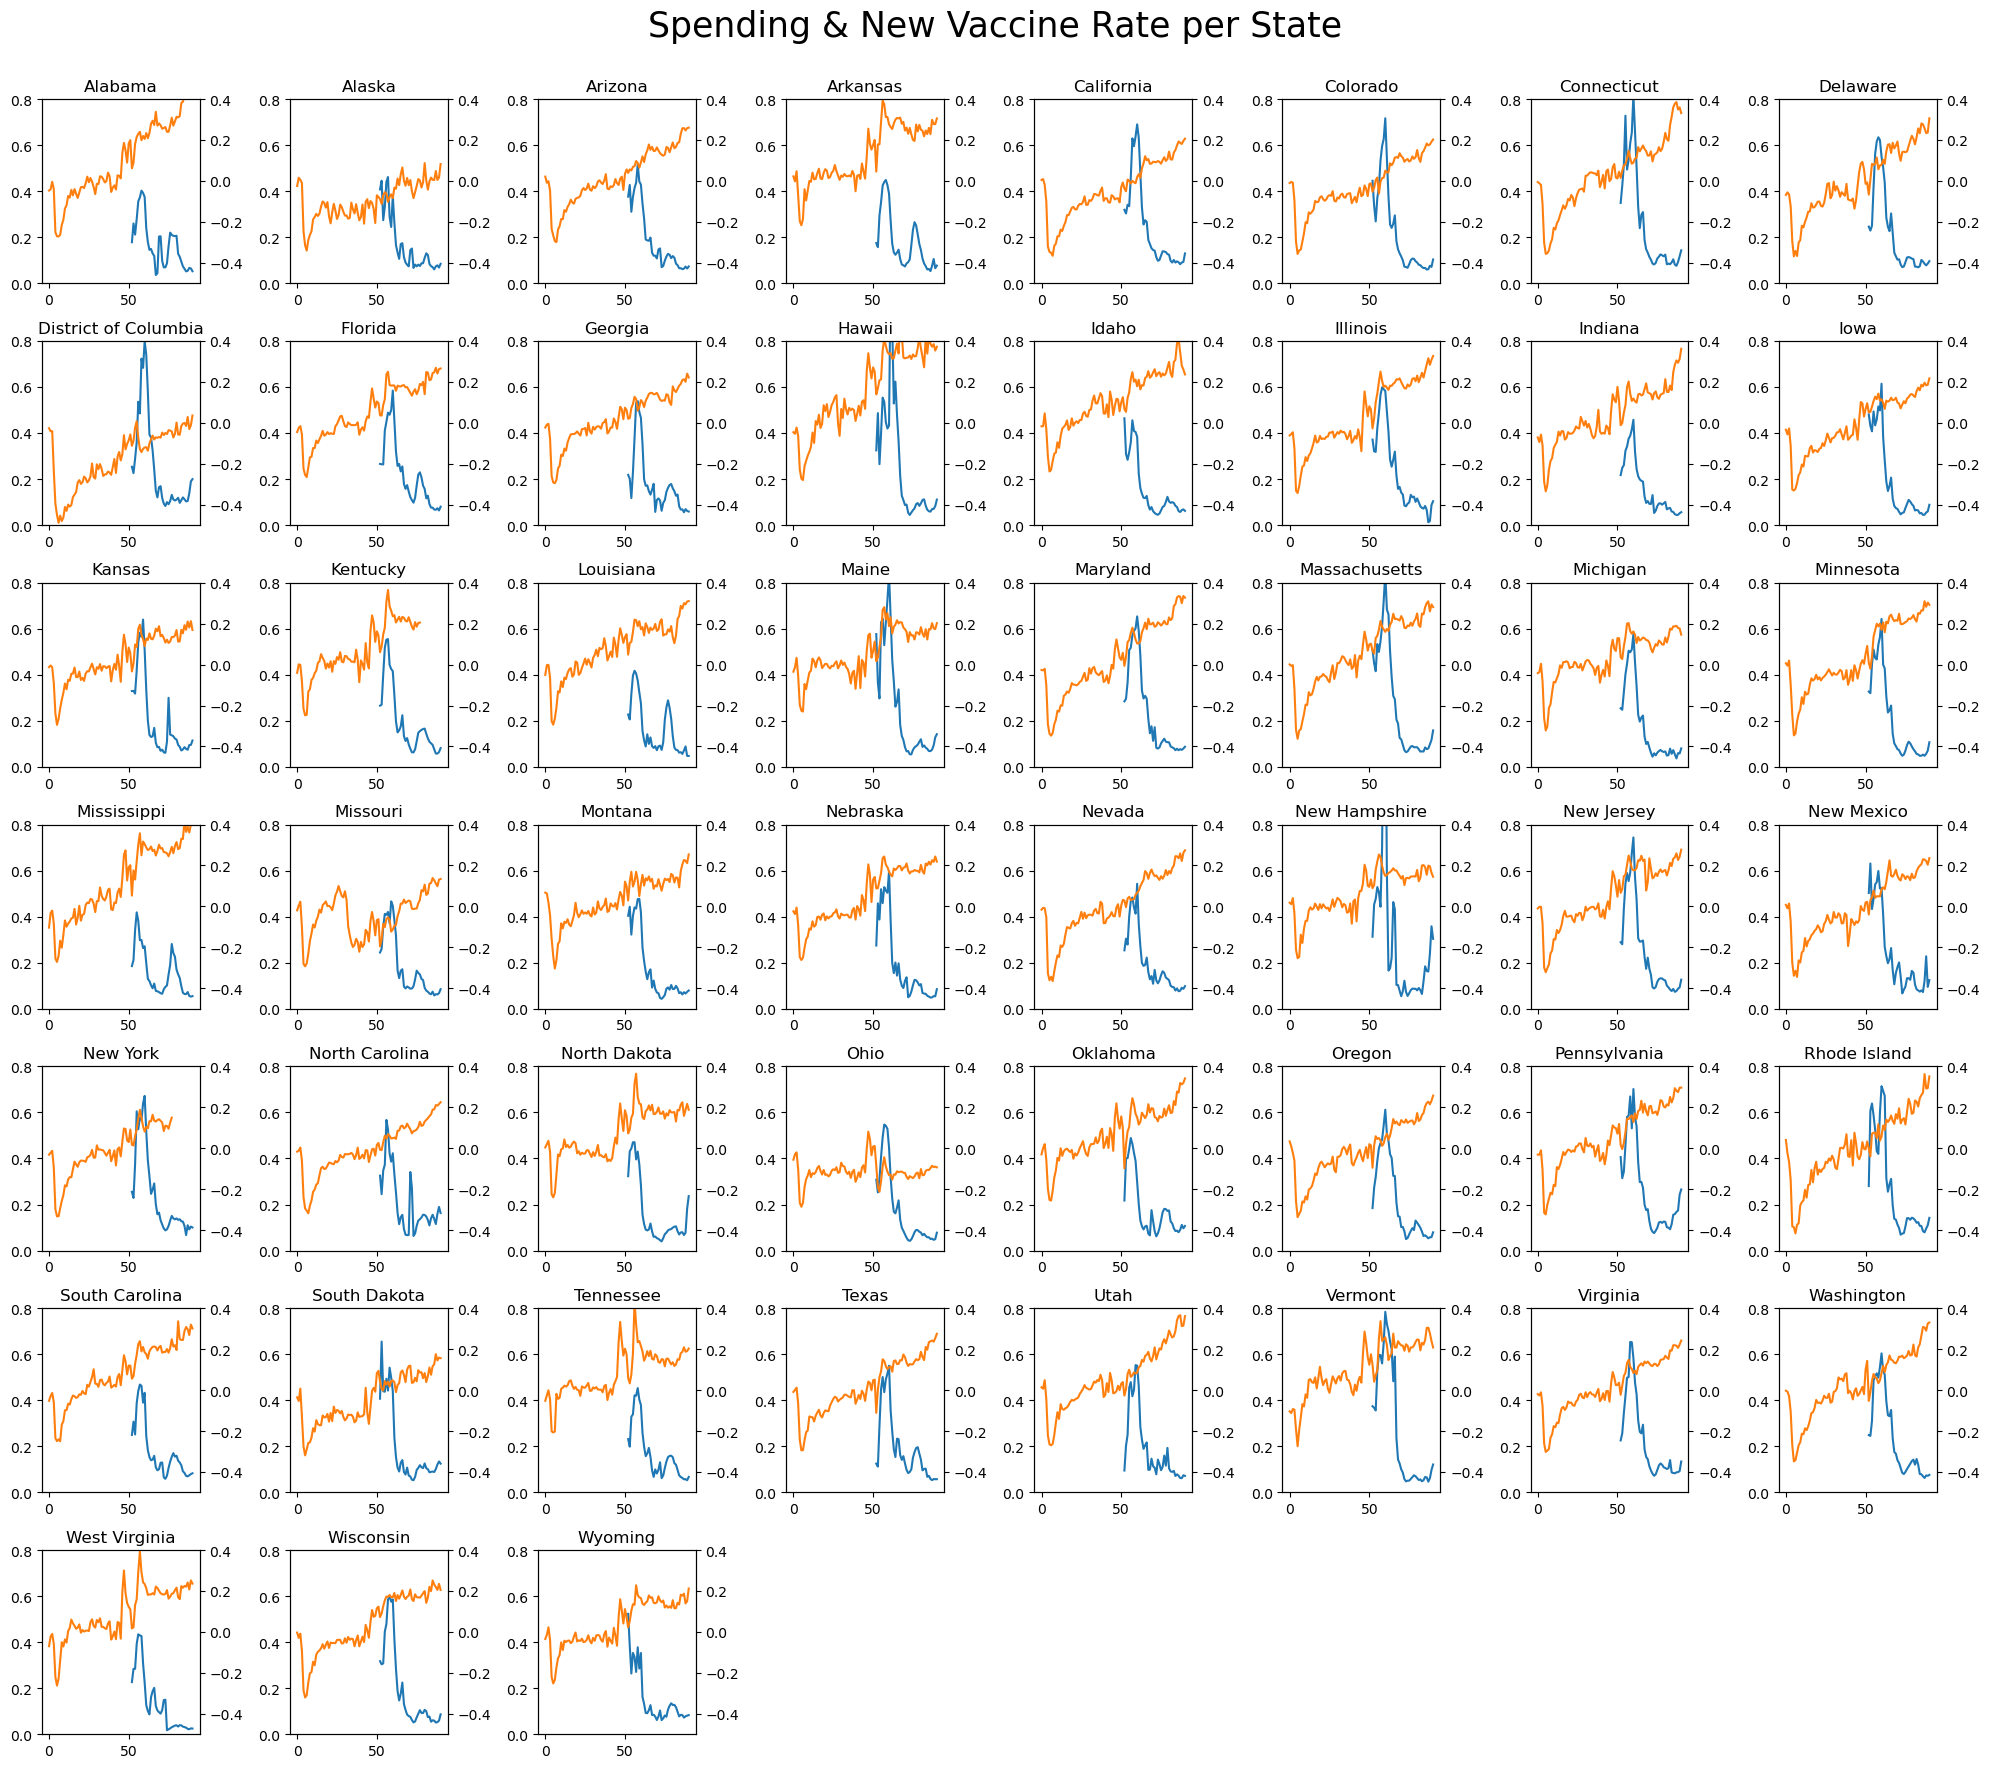

In [79]:
fig, ax = plt.subplots(nrows = 7, ncols = 8, figsize=(20,18))

states = list(set(df["statefips"]))
stateNames = list(dfStates["stname"])
s = 0
for i in range(7):
    for j in range(8):
        if s < 51:
            ax[i][j].plot(range(91), df.loc[df["statefips"] == states[s], "new_vaccine_rate"], color = "tab:blue")
            ax[i][j].set_ylim(0, 0.8)
            ax2 = ax[i][j].twinx()
            ax2.plot(range(91), df.loc[df["statefips"] == states[s], "spend_all"], color = "tab:orange")
            ax2.set_ylim(-0.5, 0.4)
            ax[i][j].title.set_text(stateNames[s])
            s += 1
        else:
            ax[i][j].set_visible(False)
fig.suptitle("Spending & New Vaccine Rate per State", fontsize=25)
fig.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()